# This script plots the HI mass against the Halo Mass 
## General plot for all galaxy types
## Plot separating the types of galaxies: centrals, satellites and orphans
### scatter plots for z=0, z=1
### Contour plots for z=0, z=1

In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
# Take a random sample of gals (k = 10^5)
#gals_ran = Random_Sample_Gals(gals, 100000)
gals_ran = gals.sample(n=100000)# one hundred thousand
gals_ran
#gals_ran.shape


,HaloID,ID,Type,CentralGal,GhostFlag,Len,MaxLen,Spin,Mvir,Rvir,...,Pos_1,Pos_2,Vel_0,Vel_1,Vel_2,NewStars_0,NewStars_1,NewStars_2,NewStars_3,NewStars_4
1479499,966199,2060000966199,0,1479499,0,48,48,0.027429,0.908853,0.036359,...,65.875916,149.444290,-420.975067,86.753777,-601.518433,4.404308e-06,6.539196e-07,1.269978e-06,8.387423e-07,6.437160e-07
1244524,633829,1650000633829,0,1244524,0,97,99,0.027535,1.836640,0.045968,...,105.421692,156.153366,6.023604,-108.094612,19.254244,5.603767e-05,1.369215e-04,9.312371e-05,8.129934e-05,3.338716e-05
1334875,1156184,1750001156184,0,1334875,0,37,40,0.022309,0.700574,0.033337,...,92.113159,127.807182,-249.976074,-102.589653,-797.675354,1.150280e-06,1.158205e-06,3.539894e-06,1.626394e-05,3.633473e-06
1495655,956669,2100000956669,0,1495655,0,49,52,0.068058,0.927787,0.036609,...,37.081238,156.106003,-218.890411,-60.630993,-148.574585,3.074685e-07,2.403333e-07,4.214863e-07,8.558598e-07,1.652134e-06
812347,365422,1420000365422,1,776298,0,40,99,0.054594,0.757377,0.034215,...,153.109497,59.199219,-414.932709,77.800705,-25.238194,7.024966e-06,5.894208e-06,5.400682e-06,1.492219e-05,8.812686e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521103,130708,1230002507988,2,487873,0,37,61,0.070053,0.700574,0.021344,...,144.594131,164.198532,195.551910,-228.844131,-62.630825,4.167810e-06,4.244985e-06,4.323656e-06,4.403812e-06,4.485518e-06
1483571,1176463,2070001176463,0,1483571,0,36,38,0.023239,0.681639,0.033034,...,29.739550,62.013119,-83.318207,-205.744781,144.071899,1.333707e-06,3.481591e-06,1.335570e-06,2.974886e-06,5.743093e-07
1206644,898709,1580000898709,0,1206644,0,56,59,0.026770,1.060328,0.038276,...,80.670235,121.847038,-320.218689,970.436707,405.281464,1.590180e-05,1.805773e-05,9.011987e-06,1.170237e-05,1.257003e-05
186823,115780,750001728554,2,179328,0,34,145,0.032659,0.643771,0.030000,...,163.988556,57.303295,-216.086761,63.869530,-48.948639,6.154613e-07,6.282909e-07,6.414057e-07,0.000000e+00,1.342084e-06


In [2]:
snaplist[0]

array([100, 115, 134, 158, 173, 192, 216, 250])

In [3]:
# Log the masses 
HIMass = np.log10(gals_ran["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals_ran["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals_ran["Type"]

HIMass:  1479499    7.421264
1244524    7.849106
1334875    6.813118
1495655    7.515563
812347     7.679476
             ...   
521103     7.442491
1483571    7.039250
1206644    7.536728
186823     6.548756
630850     6.447972
Name: HIMass, Length: 100000, dtype: float64 no. items:  (100000,)
Mvir:  1479499     9.958493
1244524    10.264024
1334875     9.845454
1495655     9.967448
812347      9.879312
             ...    
521103      9.845454
1483571     9.833555
1206644    10.025440
186823      9.808731
630850      9.782402
Name: Mvir, Length: 100000, dtype: float64 no. items:  (100000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=0
## All galaxies

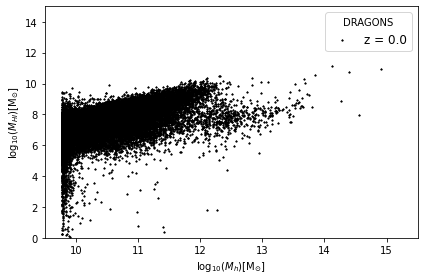

In [10]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = Mvir
y = HIMass
plot = ax.scatter(x, y, color= "black", marker= "*", s=2, label=label_z)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

# SCATTER PLOT z=0
## separated galaxies, Centrals, Satellites, and Orphans

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

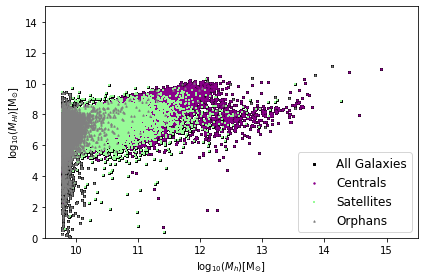

In [5]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = Mvir
y = HIMass
all_plt = ax.scatter(x, y, color= "black", marker= "s", s=2)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "darkmagenta", marker= "o", s=2)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "palegreen", marker= "+", s=2)  
orphans_plt = ax.scatter(x[Type==2], y[Type==2], color= "gray", marker= "^", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt, orphans_plt),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

## z=1

In [6]:
# z=1 
snapshot_used_1 = 192
gals_1, sim_props_1, snaplist_1 = get_gal_catalogue(snapshot_used_1)
snaplist_index_used_1 = list(snaplist_1[0]).index(snapshot_used_1)# convert to list and find the index of the snap we are using
redshift_used_1 = snaplist_1[1][snaplist_index_used_1] # Get the redshift for corresponding snapshot
redshift_used_1 = str(round(redshift_used_1, 1)) # round float to nearest whole int
gals_ran_1 = gals_1.sample(n=10000)
gals_ran_1
# Log the masses 
HIMass_1 = np.log10(gals_ran_1["HIMass"]*1e10)
print('HIMass: ', HIMass_1, 'no. items: ', HIMass_1.shape)
Mvir_1 = np.log10(gals_ran_1["Mvir"]*1e10)
print('Mvir: ', Mvir_1, 'no. items: ', HIMass_1.shape)
Type_1 = gals_ran_1["Type"]

HIMass:  271796     7.768746
783201     7.662461
1065764    7.803606
242713     9.673332
1616434    7.261774
             ...   
240449     7.273905
1186960    8.407437
314039     7.085950
1107470    7.493060
1606408    7.620797
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  271796     10.245735
783201      9.782402
1065764     9.890036
242713     11.676233
1616434     9.845454
             ...    
240449      9.967448
1186960     9.857036
314039      9.795766
1107470     9.821321
1606408     9.890036
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=1
## All galaxies

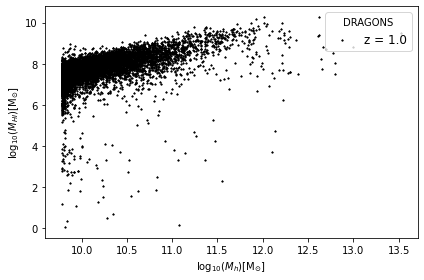

In [7]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + redshift_used_1)
x_1 = Mvir_1
y_1 = HIMass_1
plot = ax.scatter(x_1, y_1, color= "black", marker= "*", s=2, label=label_z_1)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_ylim([0,15])
#ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")

## Separated galaxies: Centrals, Satellites and Orphans.

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

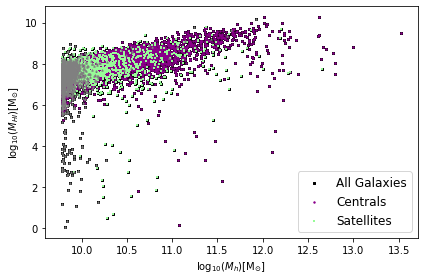

In [8]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + str(redshift_used_1))
x_1 = Mvir_1
y_1 = HIMass_1
all_plt_1 = ax.scatter(x_1, y_1, color= "black", marker= "s", s=2)  
centrals_plt_1 = ax.scatter(x_1[Type_1==0], y_1[Type_1==0], color= "darkmagenta", marker= "o", s=2)  
satellites_plt_1 = ax.scatter(x_1[Type_1==1], y_1[Type_1==1], color= "palegreen", marker= "+", s=2)  
orphans_plt_1 = ax.scatter(x_1[Type_1==2], y_1[Type_1==2], color= "gray", marker= "^", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_ylim([0,15])
#ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt_1, centrals_plt_1, satellites_plt_1),
           ('All Galaxies', 'Centrals', 'Satellites'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''